加載資料

In [3]:
import pandas as pd
import glob

# 設定你的目錄路徑
directory_path = 'C:/Users/Tommy/Desktop/eventData/AICTD/'

# 使用glob來找到該目錄下的所有CSV檔案
csv_files = glob.glob(directory_path + '*.csv')

# 用於儲存所有DataFrame的列表
dfs = []

# 遍歷找到的CSV檔案，並將每個檔案讀取為一個DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# 合併所有DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,Signature ID,Event Type
0,2023-11-30 23:34:08.111279,10.8.80.133,31464,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert
1,2023-11-30 21:40:52.126344,10.8.80.133,65163,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert
2,2023-11-30 21:14:14.571287,10.8.80.133,43159,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert
3,2023-11-30 18:35:49.396578,10.8.80.165,26907,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert
4,2023-11-30 18:09:33.132200,10.8.81.232,54820,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert
...,...,...,...,...,...,...,...,...,...,...,...,...
357831,2023-12-29 00:10:11.089913,10.0.3.7,50253,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert
357832,2023-12-29 00:06:42.883712,10.0.3.7,48456,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert
357833,2023-12-29 00:05:12.344108,10.0.3.7,44861,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert
357834,2023-12-29 00:01:35.075683,10.0.3.7,53051,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert


標記資料

In [5]:
# 篩選出signature為指定值的行
filtered_df = combined_df[combined_df['Signature']
                          == 'ET MALWARE Win32/PlugX Variant CnC Activity']


# 移除source_ip欄位中的重複值
filtered_df = filtered_df.drop_duplicates(subset='Src IP')

filtered_df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,Signature ID,Event Type
15315,2023-12-03 23:57:04.133664,10.0.5.230,54139,8.217.48.154,53,UDP,ET MALWARE Win32/PlugX Variant CnC Activity,A Network Trojan was detected,1,"{'updated_at': ['2022_05_06'], 'signature_seve...",2036499,alert
140273,2023-12-10 05:25:50.406910,10.8.81.132,54914,158.247.213.215,10013,UDP,ET MALWARE Win32/PlugX Variant CnC Activity,A Network Trojan was detected,1,"{'updated_at': ['2022_05_06'], 'signature_seve...",2036499,alert


In [6]:
import pandas as pd

# 假設 combined_df 是您的 DataFrame
# 先將所有行的 label 初始化為 'Normal'
combined_df['label'] = 'Normal'

# 指定異常的 signatures 和 Src IPs
anomaly_signatures = [
    'ET DNS Non-DNS or Non-Compliant DNS traffic on DNS port Opcode 8 through 15 set', 'ET MALWARE Win32/PlugX Variant CnC Activity', 'ET DNS Non-DNS or Non-Compliant DNS traffic on DNS port Opcode 6 or 7 set', 'ET P2P BitTorrent DHT ping request']
anomaly_src_ips = ['10.0.5.230', '10.8.80.119',
                   '10.8.80.137', '10.8.80.31', '10.8.80.91', '10.0.2.176', '10.0.7.240', '10.0.3.8	', '10.0.3.134', '10.8.81.132']

# 構建條件 - 檢查每行是否其 signature 和 Src IP 在指定的陣列中
condition = combined_df['Signature'].isin(
    anomaly_signatures) & combined_df['Src IP'].isin(anomaly_src_ips)

# 更新符合條件的行的 label 為 'Anomaly'
combined_df.loc[condition, 'label'] = 'Anomaly'

filtered_df = combined_df[combined_df['label']
                          == 'Anomaly']

filtered_df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,Signature ID,Event Type,label
17,2023-11-30 08:03:59.737126,10.8.80.31,49869,176.119.83.107,43819,UDP,ET P2P BitTorrent DHT ping request,Potential Corporate Privacy Violation,1,"{'updated_at': ['2010_07_30'], 'created_at': [...",2008581,alert,Anomaly
18,2023-11-30 07:36:23.080281,10.8.80.31,49869,31.41.193.201,57845,UDP,ET P2P BitTorrent DHT ping request,Potential Corporate Privacy Violation,1,"{'updated_at': ['2010_07_30'], 'created_at': [...",2008581,alert,Anomaly
19,2023-11-30 07:31:03.720042,10.8.80.31,49869,1.241.172.105,16508,UDP,ET P2P BitTorrent DHT ping request,Potential Corporate Privacy Violation,1,"{'updated_at': ['2010_07_30'], 'created_at': [...",2008581,alert,Anomaly
11708,2023-12-02 08:00:28.009010,10.8.80.91,46022,45.118.77.193,9147,UDP,ET P2P BitTorrent DHT ping request,Potential Corporate Privacy Violation,1,"{'updated_at': ['2010_07_30'], 'created_at': [...",2008581,alert,Anomaly
11709,2023-12-02 07:55:27.902872,10.8.80.91,46022,174.129.112.110,49182,UDP,ET P2P BitTorrent DHT ping request,Potential Corporate Privacy Violation,1,"{'updated_at': ['2010_07_30'], 'created_at': [...",2008581,alert,Anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347089,2023-12-29 00:03:41.331583,10.0.5.230,54136,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",2014701,alert,Anomaly
347090,2023-12-29 00:02:59.803347,10.0.5.230,54136,8.217.48.154,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",2014702,alert,Anomaly
347091,2023-12-29 00:01:52.101192,10.0.5.230,54140,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",2014702,alert,Anomaly
347092,2023-12-29 00:01:37.534704,10.0.5.230,54139,8.217.48.154,53,UDP,ET MALWARE Win32/PlugX Variant CnC Activity,A Network Trojan was detected,1,"{'updated_at': ['2022_05_06'], 'signature_seve...",2036499,alert,Anomaly


資料前處理 - 時間欄位

In [7]:
import pandas as pd

# 假設df是您的DataFrame，並且已經包含了'timestamp'列
# 轉換 timestamp 為 datetime 對象，並提取小時和分鐘
combined_df['timestamp'] = pd.to_datetime(combined_df['Timestamp'])
combined_df['hour'] = combined_df['timestamp'].dt.hour
combined_df['minute'] = combined_df['timestamp'].dt.minute

# 定義一個函數來判斷時間是否為上班時間


def is_work_time(hour):
    return '上班' if 9 <= hour < 18 else '下班'


# 使用apply函數應用上述函數
combined_df['work_time'] = combined_df['hour'].apply(is_work_time)

combined_df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,Signature ID,Event Type,label,timestamp,hour,minute,work_time
0,2023-11-30 23:34:08.111279,10.8.80.133,31464,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Normal,2023-11-30 23:34:08.111279,23,34,下班
1,2023-11-30 21:40:52.126344,10.8.80.133,65163,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Normal,2023-11-30 21:40:52.126344,21,40,下班
2,2023-11-30 21:14:14.571287,10.8.80.133,43159,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Normal,2023-11-30 21:14:14.571287,21,14,下班
3,2023-11-30 18:35:49.396578,10.8.80.165,26907,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Normal,2023-11-30 18:35:49.396578,18,35,下班
4,2023-11-30 18:09:33.132200,10.8.81.232,54820,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Normal,2023-11-30 18:09:33.132200,18,9,下班
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357831,2023-12-29 00:10:11.089913,10.0.3.7,50253,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Normal,2023-12-29 00:10:11.089913,0,10,下班
357832,2023-12-29 00:06:42.883712,10.0.3.7,48456,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Normal,2023-12-29 00:06:42.883712,0,6,下班
357833,2023-12-29 00:05:12.344108,10.0.3.7,44861,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Normal,2023-12-29 00:05:12.344108,0,5,下班
357834,2023-12-29 00:01:35.075683,10.0.3.7,53051,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Normal,2023-12-29 00:01:35.075683,0,1,下班


資料前處理 - 類別資料

In [8]:
from sklearn.preprocessing import LabelEncoder

# 為 category 和 signature 創建獨立的 LabelEncoder 實例
signature_encoder = LabelEncoder()
category_encoder = LabelEncoder()

combined_df['category'] = category_encoder.fit_transform(
    combined_df['Category'])
combined_df['signature'] = signature_encoder.fit_transform(
    combined_df['Signature'])

# 顯示 signature
print("Signature classes:", list(signature_encoder.classes_))
print("Signature encoded values:",
      signature_encoder.transform(signature_encoder.classes_))

# 顯示 Category
print("Category classes:", list(category_encoder.classes_))
print("Category encoded values:",
      category_encoder.transform(category_encoder.classes_))

combined_df

Signature classes: ['AIXSOAR Possible Cobalt Strike C2 server communication', 'AIXSOAR storjshare.io DNS Request', 'ET ADWARE_PUP Observed DNS Query to PUP Domain (omnatuor .com)', 'ET DNS Non-DNS or Non-Compliant DNS traffic on DNS port Opcode 6 or 7 set', 'ET DNS Non-DNS or Non-Compliant DNS traffic on DNS port Opcode 8 through 15 set', 'ET DNS Query for .cc TLD', 'ET DNS Query for .su TLD (Soviet Union) Often Malware Related', 'ET DNS Query for .to TLD', 'ET DNS Query to a *.top domain - Likely Hostile', 'ET DNS Query to a .tk domain - Likely Hostile', 'ET HUNTING File Sharing Related Domain in DNS Lookup (download .mediafire .com)', 'ET HUNTING Suspicious Domain Request for Possible COVID-19 Domain M1', 'ET HUNTING Telegram API Domain in DNS Lookup', 'ET MALWARE Win32/PlugX Variant CnC Activity', 'ET P2P BitTorrent DHT announce_peers request', 'ET P2P BitTorrent DHT nodes reply', 'ET P2P BitTorrent DHT ping request', 'ET P2P Edonkey Search Request (search by name)', 'ET P2P KuGoo P

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,Signature ID,Event Type,label,timestamp,hour,minute,work_time,category,signature
0,2023-11-30 23:34:08.111279,10.8.80.133,31464,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Normal,2023-11-30 23:34:08.111279,23,34,下班,6,26
1,2023-11-30 21:40:52.126344,10.8.80.133,65163,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Normal,2023-11-30 21:40:52.126344,21,40,下班,6,26
2,2023-11-30 21:14:14.571287,10.8.80.133,43159,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Normal,2023-11-30 21:14:14.571287,21,14,下班,6,26
3,2023-11-30 18:35:49.396578,10.8.80.165,26907,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Normal,2023-11-30 18:35:49.396578,18,35,下班,6,26
4,2023-11-30 18:09:33.132200,10.8.81.232,54820,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",2018918,alert,Normal,2023-11-30 18:09:33.132200,18,9,下班,6,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357831,2023-12-29 00:10:11.089913,10.0.3.7,50253,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Normal,2023-12-29 00:10:11.089913,0,10,下班,3,24
357832,2023-12-29 00:06:42.883712,10.0.3.7,48456,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Normal,2023-12-29 00:06:42.883712,0,6,下班,3,24
357833,2023-12-29 00:05:12.344108,10.0.3.7,44861,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Normal,2023-12-29 00:05:12.344108,0,5,下班,3,24
357834,2023-12-29 00:01:35.075683,10.0.3.7,53051,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,Normal,2023-12-29 00:01:35.075683,0,1,下班,3,24


資料前處理 - IP

In [21]:
import ipaddress
import pandas as pd


def ip_to_int(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except ValueError:
        return None


combined_df['source_ip_encoded'] = combined_df['Src IP'].apply(ip_to_int)
combined_df['destination_ip_encoded'] = combined_df['Dest IP'].apply(ip_to_int)


def categorize_ip_class(ip):
    if ip.startswith('10.'):
        return 'Class A Private'
    elif ip.startswith('172.'):
        return 'Class B Private'
    elif ip.startswith('192.168.'):
        return 'Class C Private'
    else:
        return 'Public'


combined_df['source_ip_class'] = combined_df['Src IP'].apply(
    categorize_ip_class)
combined_df['destination_ip_class'] = combined_df['Dest IP'].apply(
    categorize_ip_class)

combined_df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,...,timestamp,hour,minute,work_time,category,signature,source_ip_encoded,destination_ip_encoded,source_ip_class,destination_ip_class
0,2023-11-30 23:34:08.111279,10.8.80.133,31464,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",...,2023-11-30 23:34:08.111279,23,34,下班,6,26,168317061,134744072,Class A Private,Public
1,2023-11-30 21:40:52.126344,10.8.80.133,65163,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",...,2023-11-30 21:40:52.126344,21,40,下班,6,26,168317061,134744072,Class A Private,Public
2,2023-11-30 21:14:14.571287,10.8.80.133,43159,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",...,2023-11-30 21:14:14.571287,21,14,下班,6,26,168317061,134744072,Class A Private,Public
3,2023-11-30 18:35:49.396578,10.8.80.165,26907,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",...,2023-11-30 18:35:49.396578,18,35,下班,6,26,168317093,134744072,Class A Private,Public
4,2023-11-30 18:09:33.132200,10.8.81.232,54820,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",...,2023-11-30 18:09:33.132200,18,9,下班,6,26,168317416,134744072,Class A Private,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357831,2023-12-29 00:10:11.089913,10.0.3.7,50253,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-29 00:10:11.089913,0,10,下班,3,24,167772935,134744072,Class A Private,Public
357832,2023-12-29 00:06:42.883712,10.0.3.7,48456,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-29 00:06:42.883712,0,6,下班,3,24,167772935,134744072,Class A Private,Public
357833,2023-12-29 00:05:12.344108,10.0.3.7,44861,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-29 00:05:12.344108,0,5,下班,3,24,167772935,134744072,Class A Private,Public
357834,2023-12-29 00:01:35.075683,10.0.3.7,53051,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-29 00:01:35.075683,0,1,下班,3,24,167772935,134744072,Class A Private,Public


In [23]:
filtered_df_0 = combined_df[combined_df['label']
                          == 'Anomaly']
filtered_df_1 = combined_df[combined_df['label'] == 'Normal'] 

# 計算 'Signature' 特徵的不同值及其計數
print(filtered_df['label'].value_counts())


# 移除source_ip欄位中的重複值
filtered_df = filtered_df.drop_duplicates(subset='Signature')

label
Anomaly    61956
Name: count, dtype: int64


Model One Class SVM


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC  # 或 OneClassSVM
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
# 定義特徵和標籤
features = ['source_ip_encoded',
            'destination_ip_encoded', 'signature', 'category']
X = combined_df[features]
y = combined_df['label']

# 分割數據集：訓練集僅包含正常數據
X_train = X[y == 'Normal']


# 創建並訓練 One-Class SVM 模型
model = OneClassSVM(gamma='auto').fit(X_train)

In [10]:
import pickle

# 保存模型
with open('oneclass_svm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# 若要載入模型
# with open('oneclass_svm_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

In [9]:
features = ['source_ip_encoded',
            'destination_ip_encoded', 'signature', 'category']
X = combined_df[features]
y = combined_df['label']
X_test = X[y == 'Anomaly']
y_test = y[y == 'Anomaly']
X_test
y_test

17        Anomaly
18        Anomaly
19        Anomaly
11708     Anomaly
11709     Anomaly
           ...   
347089    Anomaly
347090    Anomaly
347091    Anomaly
347092    Anomaly
347093    Anomaly
Name: label, Length: 61956, dtype: object

In [12]:
filtered_df = combined_df[combined_df['label']
                          == 'Anomaly']


# 移除source_ip欄位中的重複值
filtered_df = filtered_df.drop_duplicates(subset='Signature')

filtered_df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,...,timestamp,hour,minute,work_time,category,signature,source_ip_encoded,destination_ip_encoded,source_ip_class,destination_ip_class
17,2023-11-30 08:03:59.737126,10.8.80.31,49869,176.119.83.107,43819,UDP,ET P2P BitTorrent DHT ping request,Potential Corporate Privacy Violation,1,"{'updated_at': ['2010_07_30'], 'created_at': [...",...,2023-11-30 08:03:59.737126,8,3,下班,6,16,168316959,2960610155,Class A Private,Public
15314,2023-12-03 23:58:25.124048,10.0.5.230,54136,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",...,2023-12-03 23:58:25.124048,23,58,下班,6,3,167773670,763752053,Class A Private,Public
15315,2023-12-03 23:57:04.133664,10.0.5.230,54139,8.217.48.154,53,UDP,ET MALWARE Win32/PlugX Variant CnC Activity,A Network Trojan was detected,1,"{'updated_at': ['2022_05_06'], 'signature_seve...",...,2023-12-03 23:57:04.133664,23,57,下班,0,13,167773670,148451482,Class A Private,Public
15316,2023-12-03 23:57:04.133664,10.0.5.230,54139,8.217.48.154,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",...,2023-12-03 23:57:04.133664,23,57,下班,6,4,167773670,148451482,Class A Private,Public


In [14]:
with open('oneclass_svm_model.pkl','rb') as file:
    loaded_model = pickle.load(file)
# 顯示模型參數
print("Gamma:", model.gamma)

# 顯示支持向量
print("Support vectors:\n", model.support_vectors_)

# 顯示支持向量的索引
print("Support vector indices:\n", model.support_)

# 顯示對偶係數
print("Dual coefficients:\n", model.dual_coef_)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Gamma: auto
Support vectors:
 [[1.68317061e+08 1.34744072e+08 2.60000000e+01 6.00000000e+00]
 [1.68317061e+08 1.34744072e+08 2.60000000e+01 6.00000000e+00]
 [1.68317061e+08 1.34744072e+08 2.60000000e+01 6.00000000e+00]
 ...
 [1.67773062e+08 1.68430090e+07 1.20000000e+01 3.00000000e+00]
 [1.67773062e+08 1.34744072e+08 1.20000000e+01 3.00000000e+00]
 [1.67773062e+08 1.68430090e+07 1.20000000e+01 3.00000000e+00]]
Support vector indices:
 [     0      1      2 ... 295836 295850 295851]
Dual coefficients:
 [[1. 1. 1. ... 1. 1. 1.]]
Confusion Matrix:
 [[61956]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     61956

    accuracy                           1.00     61956
   macro avg       1.00      1.00      1.00     61956
weighted avg       1.00      1.00      1.00     61956



In [23]:
import pandas as pd
import glob

directory_path = 'C:/Users/Tommy/Desktop/eventData/AICTD/'

# 為 20 - 24 號的每一天建立一個 glob 模式
dates = ['2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24']
patterns = [directory_path + date + '_severity*.csv' for date in dates]

# 使用 glob 找到所有匹配的文件
csv_files = []
for pattern in patterns:
    csv_files.extend(glob.glob(pattern))

# 用於儲存所有 DataFrame 的列表
dfs = []

# 遍歷找到的 CSV 檔案，並將每個檔案讀取為一個 DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# 合併所有 DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,Signature ID,Event Type
0,2023-12-20 23:58:56.565185,10.0.5.230,55441,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",2014701,alert
1,2023-12-20 23:58:18.047460,10.0.5.230,63630,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",2014702,alert
2,2023-12-20 23:56:54.980946,10.0.5.230,59241,8.217.48.154,53,UDP,ET MALWARE Win32/PlugX Variant CnC Activity,A Network Trojan was detected,1,"{'updated_at': ['2022_05_06'], 'signature_seve...",2036499,alert
3,2023-12-20 23:56:53.212564,10.0.5.230,62919,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",2014701,alert
4,2023-12-20 23:56:18.002050,10.0.5.230,63874,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",2014702,alert
...,...,...,...,...,...,...,...,...,...,...,...,...
59574,2023-12-24 00:10:12.732660,10.0.3.7,34325,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert
59575,2023-12-24 00:06:38.412083,10.0.3.7,43108,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert
59576,2023-12-24 00:05:12.869907,10.0.3.7,57972,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert
59577,2023-12-24 00:02:06.587529,10.0.3.7,46540,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert


In [16]:
# 篩選出signature為指定值的行
filtered_df = combined_df[combined_df['Signature']
                          == 'ET P2P KuGoo P2P Connection']


# 移除source_ip欄位中的重複值
filtered_df = filtered_df.drop_duplicates(subset='Src IP')

filtered_df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,Signature ID,Event Type
26608,2023-12-22 19:23:13.163514,10.0.7.240,26246,101.33.103.121,10334,UDP,ET P2P KuGoo P2P Connection,Potential Corporate Privacy Violation,1,"{'updated_at': ['2010_07_30'], 'created_at': [...",2009966,alert


In [24]:
import pandas as pd

# 假設df是您的DataFrame，並且已經包含了'timestamp'列
# 轉換 timestamp 為 datetime 對象，並提取小時和分鐘
combined_df['timestamp'] = pd.to_datetime(combined_df['Timestamp'])
combined_df['hour'] = combined_df['timestamp'].dt.hour
combined_df['minute'] = combined_df['timestamp'].dt.minute

# 定義一個函數來判斷時間是否為上班時間


def is_work_time(hour):
    return '上班' if 9 <= hour < 18 else '下班'


# 使用apply函數應用上述函數
combined_df['work_time'] = combined_df['hour'].apply(is_work_time)

combined_df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,Signature ID,Event Type,timestamp,hour,minute,work_time
0,2023-12-20 23:58:56.565185,10.0.5.230,55441,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",2014701,alert,2023-12-20 23:58:56.565185,23,58,下班
1,2023-12-20 23:58:18.047460,10.0.5.230,63630,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",2014702,alert,2023-12-20 23:58:18.047460,23,58,下班
2,2023-12-20 23:56:54.980946,10.0.5.230,59241,8.217.48.154,53,UDP,ET MALWARE Win32/PlugX Variant CnC Activity,A Network Trojan was detected,1,"{'updated_at': ['2022_05_06'], 'signature_seve...",2036499,alert,2023-12-20 23:56:54.980946,23,56,下班
3,2023-12-20 23:56:53.212564,10.0.5.230,62919,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",2014701,alert,2023-12-20 23:56:53.212564,23,56,下班
4,2023-12-20 23:56:18.002050,10.0.5.230,63874,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",2014702,alert,2023-12-20 23:56:18.002050,23,56,下班
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59574,2023-12-24 00:10:12.732660,10.0.3.7,34325,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,2023-12-24 00:10:12.732660,0,10,下班
59575,2023-12-24 00:06:38.412083,10.0.3.7,43108,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,2023-12-24 00:06:38.412083,0,6,下班
59576,2023-12-24 00:05:12.869907,10.0.3.7,57972,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,2023-12-24 00:05:12.869907,0,5,下班
59577,2023-12-24 00:02:06.587529,10.0.3.7,46540,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,2023-12-24 00:02:06.587529,0,2,下班


In [35]:
import pandas as pd

# 假設 combined_df 是您的 DataFrame
# 先將所有行的 label 初始化為 'Normal'
combined_df['label'] = 'Normal'

# 指定異常的 signatures 和 Src IPs
# anomaly_signatures = [
#     'ET MALWARE Win32/PlugX Variant CnC Activity', 'ET P2P BitTorrent DHT ping request', 'ET P2P KuGoo P2P Connection']
# anomaly_src_ips = ['10.0.5.230', '10.0.2.176',
#                    '10.0.7.240', '10.0.3.8', '10.0.7.240']

# 構建條件 - 檢查每行是否其 signature 和 Src IP 在指定的陣列中
condition = combined_df['Signature'].isin(
    anomaly_signatures) & combined_df['Src IP'].isin(anomaly_src_ips)

# # 更新符合條件的行的 label 為 'Anomaly'
# combined_df.loc[condition, 'label'] = 'Anomaly'

# filtered_df = combined_df[combined_df['label']
#                           == 'Anomaly']


combined_df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,...,hour,minute,work_time,category,signature,source_ip_encoded,destination_ip_encoded,source_ip_class,destination_ip_class,label
0,2023-12-20 23:58:56.565185,10.0.5.230,55441,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",...,23,58,下班,5,1,167773670,763752053,Class A Private,Public,Normal
1,2023-12-20 23:58:18.047460,10.0.5.230,63630,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",...,23,58,下班,5,2,167773670,763752053,Class A Private,Public,Normal
2,2023-12-20 23:56:54.980946,10.0.5.230,59241,8.217.48.154,53,UDP,ET MALWARE Win32/PlugX Variant CnC Activity,A Network Trojan was detected,1,"{'updated_at': ['2022_05_06'], 'signature_seve...",...,23,56,下班,0,10,167773670,148451482,Class A Private,Public,Normal
3,2023-12-20 23:56:53.212564,10.0.5.230,62919,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",...,23,56,下班,5,1,167773670,763752053,Class A Private,Public,Normal
4,2023-12-20 23:56:18.002050,10.0.5.230,63874,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",...,23,56,下班,5,2,167773670,763752053,Class A Private,Public,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59574,2023-12-24 00:10:12.732660,10.0.3.7,34325,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,0,10,下班,3,17,167772935,134744072,Class A Private,Public,Normal
59575,2023-12-24 00:06:38.412083,10.0.3.7,43108,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,0,6,下班,3,17,167772935,134744072,Class A Private,Public,Normal
59576,2023-12-24 00:05:12.869907,10.0.3.7,57972,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,0,5,下班,3,17,167772935,134744072,Class A Private,Public,Normal
59577,2023-12-24 00:02:06.587529,10.0.3.7,46540,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,0,2,下班,3,17,167772935,134744072,Class A Private,Public,Normal


In [25]:
from sklearn.preprocessing import LabelEncoder

# 為 category 和 signature 創建獨立的 LabelEncoder 實例
signature_encoder = LabelEncoder()
category_encoder = LabelEncoder()

combined_df['category'] = category_encoder.fit_transform(
    combined_df['Category'])
combined_df['signature'] = signature_encoder.fit_transform(
    combined_df['Signature'])

# 顯示 signature
print("Signature classes:", list(signature_encoder.classes_))
print("Signature encoded values:",
      signature_encoder.transform(signature_encoder.classes_))

# 顯示 Category
print("Category classes:", list(category_encoder.classes_))
print("Category encoded values:",
      category_encoder.transform(category_encoder.classes_))

combined_df

Signature classes: ['ET ADWARE_PUP Observed DNS Query to PUP Domain (omnatuor .com)', 'ET DNS Non-DNS or Non-Compliant DNS traffic on DNS port Opcode 6 or 7 set', 'ET DNS Non-DNS or Non-Compliant DNS traffic on DNS port Opcode 8 through 15 set', 'ET DNS Query for .cc TLD', 'ET DNS Query for .su TLD (Soviet Union) Often Malware Related', 'ET DNS Query for .to TLD', 'ET DNS Query to a *.top domain - Likely Hostile', 'ET DNS Query to a .tk domain - Likely Hostile', 'ET HUNTING Suspicious Domain Request for Possible COVID-19 Domain M1', 'ET HUNTING Telegram API Domain in DNS Lookup', 'ET MALWARE Win32/PlugX Variant CnC Activity', 'ET P2P BitTorrent DHT nodes reply', 'ET P2P BitTorrent DHT ping request', 'ET P2P Edonkey Search Request (search by name)', 'ET P2P KuGoo P2P Connection', 'ET P2P Vuze BT UDP Connection (5)', 'ET POLICY GNU/Linux APT User-Agent Outbound likely related to package management', 'ET POLICY Pastebin-style service note .youdao .com  in DNS query', 'ET POLICY possible X

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,Signature ID,Event Type,timestamp,hour,minute,work_time,category,signature
0,2023-12-20 23:58:56.565185,10.0.5.230,55441,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",2014701,alert,2023-12-20 23:58:56.565185,23,58,下班,5,1
1,2023-12-20 23:58:18.047460,10.0.5.230,63630,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",2014702,alert,2023-12-20 23:58:18.047460,23,58,下班,5,2
2,2023-12-20 23:56:54.980946,10.0.5.230,59241,8.217.48.154,53,UDP,ET MALWARE Win32/PlugX Variant CnC Activity,A Network Trojan was detected,1,"{'updated_at': ['2022_05_06'], 'signature_seve...",2036499,alert,2023-12-20 23:56:54.980946,23,56,下班,0,10
3,2023-12-20 23:56:53.212564,10.0.5.230,62919,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",2014701,alert,2023-12-20 23:56:53.212564,23,56,下班,5,1
4,2023-12-20 23:56:18.002050,10.0.5.230,63874,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",2014702,alert,2023-12-20 23:56:18.002050,23,56,下班,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59574,2023-12-24 00:10:12.732660,10.0.3.7,34325,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,2023-12-24 00:10:12.732660,0,10,下班,3,17
59575,2023-12-24 00:06:38.412083,10.0.3.7,43108,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,2023-12-24 00:06:38.412083,0,6,下班,3,17
59576,2023-12-24 00:05:12.869907,10.0.3.7,57972,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,2023-12-24 00:05:12.869907,0,5,下班,3,17
59577,2023-12-24 00:02:06.587529,10.0.3.7,46540,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",2035668,alert,2023-12-24 00:02:06.587529,0,2,下班,3,17


In [26]:
import ipaddress
import pandas as pd


def ip_to_int(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except ValueError:
        return None


combined_df['source_ip_encoded'] = combined_df['Src IP'].apply(ip_to_int)
combined_df['destination_ip_encoded'] = combined_df['Dest IP'].apply(ip_to_int)


def categorize_ip_class(ip):
    if ip.startswith('10.'):
        return 'Class A Private'
    elif ip.startswith('172.'):
        return 'Class B Private'
    elif ip.startswith('192.168.'):
        return 'Class C Private'
    else:
        return 'Public'


combined_df['source_ip_class'] = combined_df['Src IP'].apply(
    categorize_ip_class)
combined_df['destination_ip_class'] = combined_df['Dest IP'].apply(
    categorize_ip_class)

combined_df

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,...,timestamp,hour,minute,work_time,category,signature,source_ip_encoded,destination_ip_encoded,source_ip_class,destination_ip_class
0,2023-12-20 23:58:56.565185,10.0.5.230,55441,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",...,2023-12-20 23:58:56.565185,23,58,下班,5,1,167773670,763752053,Class A Private,Public
1,2023-12-20 23:58:18.047460,10.0.5.230,63630,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",...,2023-12-20 23:58:18.047460,23,58,下班,5,2,167773670,763752053,Class A Private,Public
2,2023-12-20 23:56:54.980946,10.0.5.230,59241,8.217.48.154,53,UDP,ET MALWARE Win32/PlugX Variant CnC Activity,A Network Trojan was detected,1,"{'updated_at': ['2022_05_06'], 'signature_seve...",...,2023-12-20 23:56:54.980946,23,56,下班,0,10,167773670,148451482,Class A Private,Public
3,2023-12-20 23:56:53.212564,10.0.5.230,62919,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",...,2023-12-20 23:56:53.212564,23,56,下班,5,1,167773670,763752053,Class A Private,Public
4,2023-12-20 23:56:18.002050,10.0.5.230,63874,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",...,2023-12-20 23:56:18.002050,23,56,下班,5,2,167773670,763752053,Class A Private,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59574,2023-12-24 00:10:12.732660,10.0.3.7,34325,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-24 00:10:12.732660,0,10,下班,3,17,167772935,134744072,Class A Private,Public
59575,2023-12-24 00:06:38.412083,10.0.3.7,43108,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-24 00:06:38.412083,0,6,下班,3,17,167772935,134744072,Class A Private,Public
59576,2023-12-24 00:05:12.869907,10.0.3.7,57972,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-24 00:05:12.869907,0,5,下班,3,17,167772935,134744072,Class A Private,Public
59577,2023-12-24 00:02:06.587529,10.0.3.7,46540,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-24 00:02:06.587529,0,2,下班,3,17,167772935,134744072,Class A Private,Public


In [38]:
import pickle
import pandas as pd

# 載入模型
with open('./oneclass_svm_model.pkl', 'rb') as file:
    model = pickle.load(file)
test_data = combined_df
features = ['source_ip_encoded','destination_ip_encoded', 'signature', 'category']
X_test = test_data[features]
X_test

# 檢查 test_data 的前幾行
print(test_data.head())

predictions = model.predict(X_test)

                    Timestamp      Src IP  Src Port         Dest IP  \
0  2023-12-20 23:58:56.565185  10.0.5.230     55441  45.133.238.117   
1  2023-12-20 23:58:18.047460  10.0.5.230     63630  45.133.238.117   
2  2023-12-20 23:56:54.980946  10.0.5.230     59241    8.217.48.154   
3  2023-12-20 23:56:53.212564  10.0.5.230     62919  45.133.238.117   
4  2023-12-20 23:56:18.002050  10.0.5.230     63874  45.133.238.117   

   Dest Port Proto                                          Signature  \
0         53   UDP  ET DNS Non-DNS or Non-Compliant DNS traffic on...   
1         53   UDP  ET DNS Non-DNS or Non-Compliant DNS traffic on...   
2         53   UDP        ET MALWARE Win32/PlugX Variant CnC Activity   
3         53   UDP  ET DNS Non-DNS or Non-Compliant DNS traffic on...   
4         53   UDP  ET DNS Non-DNS or Non-Compliant DNS traffic on...   

                                Category  Severity  \
0  Potential Corporate Privacy Violation         1   
1  Potential Corporate Pri

In [43]:
import pandas as pd

# 將預測結果轉換為 pandas Series 以方便統計
predictions_series = pd.Series(predictions)

# 計算每個類別的數量
count = predictions_series.value_counts()

# 顯示統計結果
print(count)

-1    59579
Name: count, dtype: int64


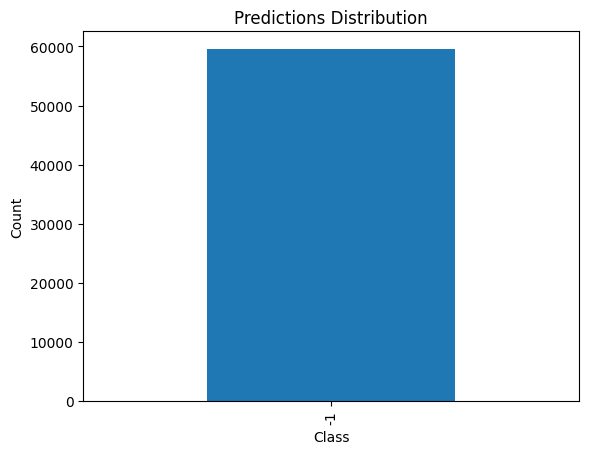

In [44]:
import matplotlib.pyplot as plt

# 繪製條形圖
predictions_series.value_counts().plot(kind='bar')

# 設置標題和標籤
plt.title('Predictions Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# 顯示圖表
plt.show()

In [28]:
import pickle
import pandas as pd

# 載入模型
with open('./oneclass_svm_model.pkl', 'rb') as file:
    model = pickle.load(file)

# 加載本地 CSV 數據
test_data = combined_df

# 特徵和真實標籤
features = ['source_ip_encoded',
            'destination_ip_encoded', 'signature', 'category']
X_test = test_data[features]
y_test = test_data['label']  # 真實標籤列名，需要根據您的數據進行調整

# 將真實標籤轉換為數字（假設 'Anomaly' 為 1，'Normal' 為 0）
y_test_numeric = [1 if label == 'Anomaly' else 0 for label in y_test]

# 進行預測
predictions = model.predict(X_test)
predictions_numeric = [1 if i == -1 else 0 for i in predictions]

# 計算混淆矩陣和分類報告
conf_matrix = confusion_matrix(y_test_numeric, predictions_numeric)
report = classification_report(y_test_numeric, predictions_numeric)

print(conf_matrix)
print(report)

[[    0 56537]
 [    0  3042]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56537
           1       0.05      1.00      0.10      3042

    accuracy                           0.05     59579
   macro avg       0.03      0.50      0.05     59579
weighted avg       0.00      0.05      0.00     59579



d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


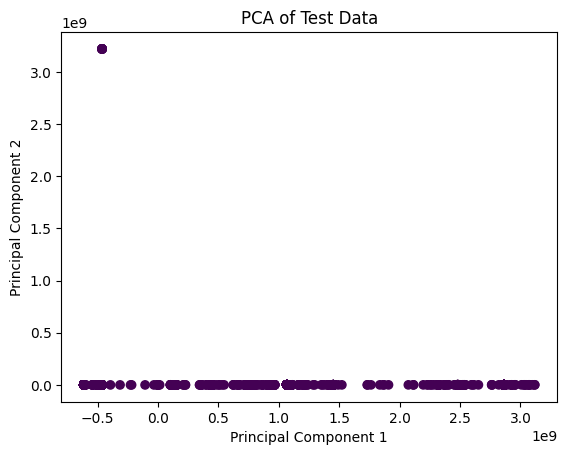

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 對高維數據進行 PCA 降維到二維
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# 繪製降維後的數據點
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=predictions_numeric)
plt.title('PCA of Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 創建一個網格來繪製決策邊界
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# 預測網格點的分類
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 繪製決策邊界和數據點
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=predictions_numeric)
plt.title('Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but OneClassSVM is expecting 4 features as input.

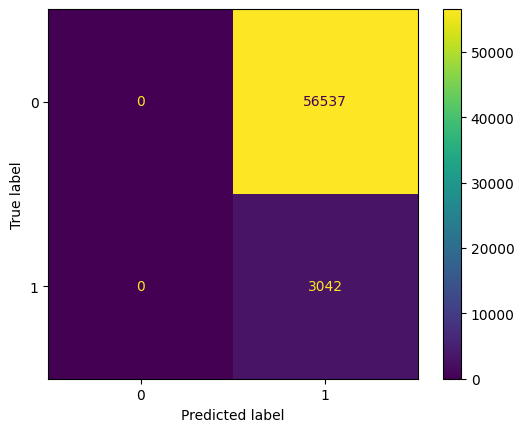

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

# 繪製混淆矩陣
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.show()

In [4]:
import ipaddress
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import glob

# 設定你的目錄路徑
directory_path = 'C:/Users/Tommy/Desktop/eventData/AICTD/'

# 使用glob來找到該目錄下的所有CSV檔案
csv_files = glob.glob(directory_path + '2023-12-29_severity_*.csv')

# 用於儲存所有DataFrame的列表
dfs = []

# 遍歷找到的CSV檔案，並將每個檔案讀取為一個DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# 合併所有DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

combined_df['timestamp'] = pd.to_datetime(combined_df['Timestamp'])
combined_df['hour'] = combined_df['timestamp'].dt.hour
combined_df['minute'] = combined_df['timestamp'].dt.minute

# 定義一個函數來判斷時間是否為上班時間


def is_work_time(hour):
    return '上班' if 9 <= hour < 18 else '下班'


# 使用apply函數應用上述函數
combined_df['work_time'] = combined_df['hour'].apply(is_work_time)


# 為 category 和 signature 創建獨立的 LabelEncoder 實例
signature_encoder = LabelEncoder()
category_encoder = LabelEncoder()

combined_df['category'] = category_encoder.fit_transform(
    combined_df['Category'])
combined_df['signature'] = signature_encoder.fit_transform(
    combined_df['Signature'])

# 顯示 signature
print("Signature classes:", list(signature_encoder.classes_))
print("Signature encoded values:",
      signature_encoder.transform(signature_encoder.classes_))

# 顯示 Category
print("Category classes:", list(category_encoder.classes_))
print("Category encoded values:",
      category_encoder.transform(category_encoder.classes_))


def ip_to_int(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except ValueError:
        return None

combined_df['source_ip_encoded'] = combined_df['Src IP'].apply(ip_to_int)
combined_df['destination_ip_encoded'] = combined_df['Dest IP'].apply(ip_to_int)


def categorize_ip_class(ip):
    if ip.startswith('10.'):
        return 'Class A Private'
    elif ip.startswith('172.'):
        return 'Class B Private'
    elif ip.startswith('192.168.'):
        return 'Class C Private'
    else:
        return 'Public'


combined_df['source_ip_class'] = combined_df['Src IP'].apply(
    categorize_ip_class)
combined_df['destination_ip_class'] = combined_df['Dest IP'].apply(
    categorize_ip_class)

combined_df

Signature classes: ['ET DNS Non-DNS or Non-Compliant DNS traffic on DNS port Opcode 6 or 7 set', 'ET DNS Non-DNS or Non-Compliant DNS traffic on DNS port Opcode 8 through 15 set', 'ET DNS Query for .cc TLD', 'ET DNS Query for .to TLD', 'ET DNS Query to a *.top domain - Likely Hostile', 'ET HUNTING Telegram API Domain in DNS Lookup', 'ET MALWARE Win32/PlugX Variant CnC Activity', 'ET P2P BitTorrent DHT ping request', 'ET P2P Vuze BT UDP Connection', 'ET P2P Vuze BT UDP Connection (5)', 'ET POLICY GNU/Linux APT User-Agent Outbound likely related to package management', 'ET POLICY Pastebin-style service note .youdao .com  in DNS query', 'ET POLICY possible Xiaomi phone data leakage DNS', 'ET SCAN Behavioral Unusual Port 445 traffic Potential Scan or Infection', 'SURICATA IPv4 with ICMPv6 header', 'SURICATA STREAM 3way handshake wrong seq wrong ack']
Signature encoded values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Category classes: ['A Network Trojan was detected', 'Generic Prot

,Timestamp,Src IP,Src Port,Dest IP,Dest Port,Proto,Signature,Category,Severity,Metadata,...,timestamp,hour,minute,work_time,category,signature,source_ip_encoded,destination_ip_encoded,source_ip_class,destination_ip_class
0,2023-12-29 23:59:43.227864,10.0.5.230,54136,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",...,2023-12-29 23:59:43.227864,23,59,下班,4,1,167773670,763752053,Class A Private,Public
1,2023-12-29 23:58:27.131119,10.0.5.230,61045,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_04_18'], 'created_at': [...",...,2023-12-29 23:58:27.131119,23,58,下班,4,0,167773670,763752053,Class A Private,Public
2,2023-12-29 23:58:23.953902,10.0.5.230,61618,8.217.48.154,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",...,2023-12-29 23:58:23.953902,23,58,下班,4,1,167773670,148451482,Class A Private,Public
3,2023-12-29 23:58:22.238291,10.8.80.188,2329,8.8.8.8,53,UDP,ET POLICY possible Xiaomi phone data leakage DNS,Potential Corporate Privacy Violation,1,"{'updated_at': ['2020_09_15'], 'created_at': [...",...,2023-12-29 23:58:22.238291,23,58,下班,4,12,168317116,134744072,Class A Private,Public
4,2023-12-29 23:57:43.498660,10.0.5.230,55943,45.133.238.117,53,UDP,ET DNS Non-DNS or Non-Compliant DNS traffic on...,Potential Corporate Privacy Violation,1,"{'updated_at': ['2022_07_18'], 'performance_im...",...,2023-12-29 23:57:43.498660,23,57,下班,4,1,167773670,763752053,Class A Private,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13200,2023-12-29 00:10:11.089913,10.0.3.7,50253,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-29 00:10:11.089913,0,10,下班,2,11,167772935,134744072,Class A Private,Public
13201,2023-12-29 00:06:42.883712,10.0.3.7,48456,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-29 00:06:42.883712,0,6,下班,2,11,167772935,134744072,Class A Private,Public
13202,2023-12-29 00:05:12.344108,10.0.3.7,44861,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-29 00:05:12.344108,0,5,下班,2,11,167772935,134744072,Class A Private,Public
13203,2023-12-29 00:01:35.075683,10.0.3.7,53051,8.8.8.8,53,UDP,ET POLICY Pastebin-style service note .youdao ...,Misc activity,3,"{'updated_at': ['2022_05_02'], 'signature_seve...",...,2023-12-29 00:01:35.075683,0,1,下班,2,11,167772935,134744072,Class A Private,Public


In [17]:
import pickle
import pandas as pd

# 載入模型
with open('./oneclass_svm_model.pkl', 'rb') as file:
    model = pickle.load(file)

# 確保 combined_df 已經完成相同的預處理步驟
# 這裡取 'source_ip_encoded', 'destination_ip_encoded', 'signature', 'category' 為特徵
features = ['source_ip_encoded',
            'destination_ip_encoded', 'signature', 'category']
X = combined_df[features]

# 使用模型進行預測
predictions = model.predict(X)

# 將預測結果從 -1 和 1 轉換為 'Anomaly' 和 'Normal'
predictions = ['Anomaly' if i == -1 else 'Normal' for i in predictions]

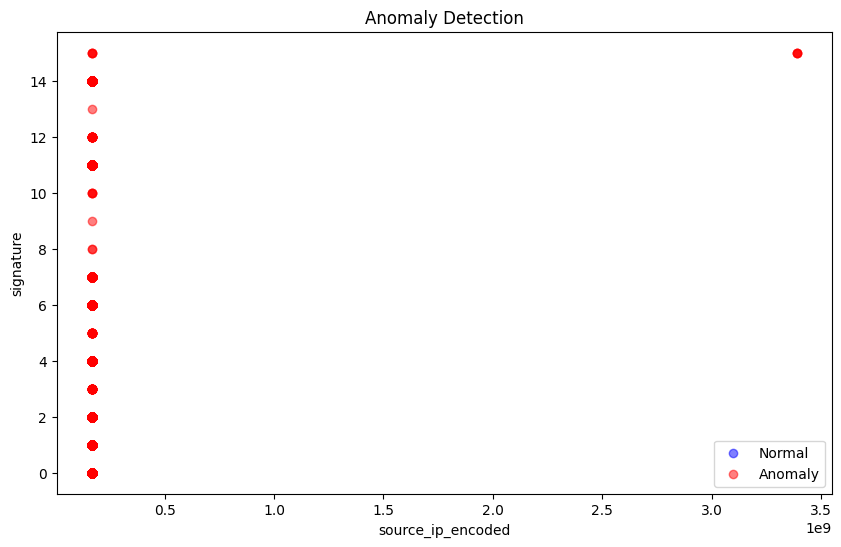

In [10]:
import matplotlib.pyplot as plt

# 假設 'feature1' 和 'feature2' 是可以直觀表示的二維特徵
feature1 = 'source_ip_encoded'  # 替換為實際的特徵名稱
feature2 = 'signature'  # 替換為實際的特徵名稱

# 繪製散點圖
plt.figure(figsize=(10, 6))
for label, color in zip(['Normal', 'Anomaly'], ['blue', 'red']):
    mask = [pred == label for pred in predictions]
    plt.scatter(combined_df.loc[mask, feature1], combined_df.loc[mask, feature2],
                color=color, label=label, alpha=0.5)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Anomaly Detection')
plt.legend()
plt.show()

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 降維
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 使用原始數據進行預測
original_predictions = model.predict(X)

# 創建網格用於決策邊界的可視化
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# 計算決策函數的值
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 繪製決策函數的等高線圖
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

# 繪製數據點
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=5, color='k')
plt.title("Anomaly Detection with One-Class SVM")
plt.axis('tight')
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
plt.show()

d:\handson-ml3\Practice\myproject3.11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but OneClassSVM is expecting 4 features as input.

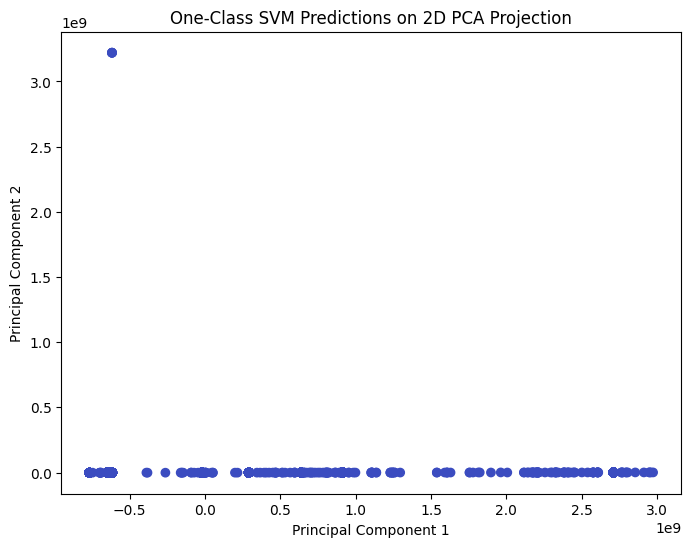

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 降維
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 使用原始數據進行預測
original_predictions = model.predict(X)

# 繪製降維後數據的散點圖，顏色根據原始預測結果區分
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=original_predictions, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('One-Class SVM Predictions on 2D PCA Projection')
plt.show()